In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,numpy,sklearn

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 3.5.2
IPython 5.1.0

scipy 0.18.1
numpy 1.11.2
sklearn 0.18.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.1.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [2]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
print(cancer.data.shape)
print(cancer.feature_names)
print(cancer.target_names)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [3]:
cancer.data[100:110, 7]

array([ 0.04489,  0.     ,  0.0177 ,  0.03029,  0.01201,  0.09601,
        0.03485,  0.01921,  0.1823 ,  0.01899])

In [4]:
cancer.target[100:110]

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

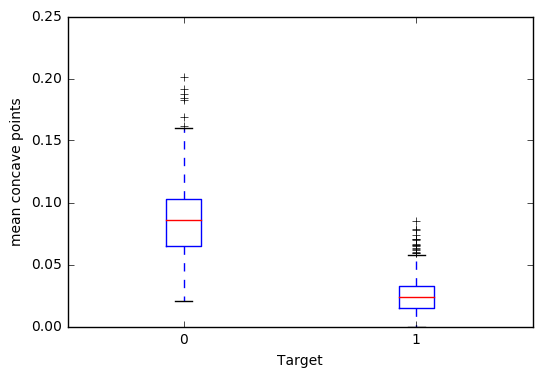

In [5]:
plt.boxplot([cancer.data[cancer.target==0, 7], cancer.data[cancer.target==1, 7]])
plt.xticks([1, 2], [0, 1])
plt.xlabel('Target')
plt.ylabel('mean concave points')
plt.show()

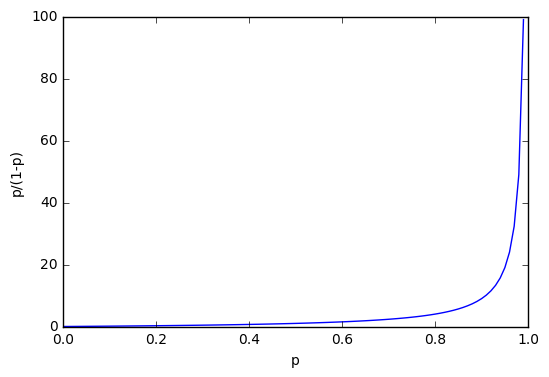

In [6]:
x = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in x]
plt.plot(x, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

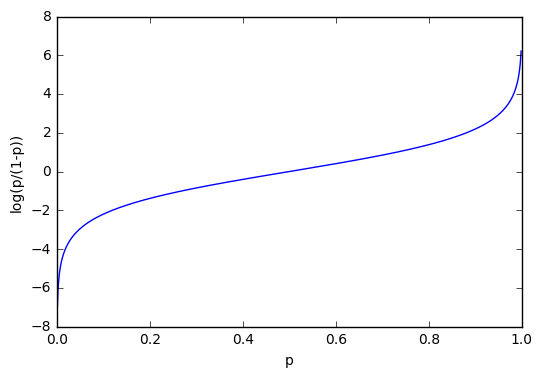

In [7]:
x = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in x]
plt.plot(x, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

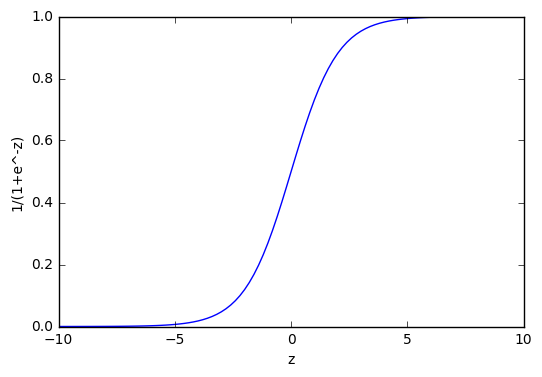

In [8]:
x = np.arange(-10., 10., 0.2)
sig = [1/(1+np.exp(-z)) for z in x]
plt.plot(x, sig)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

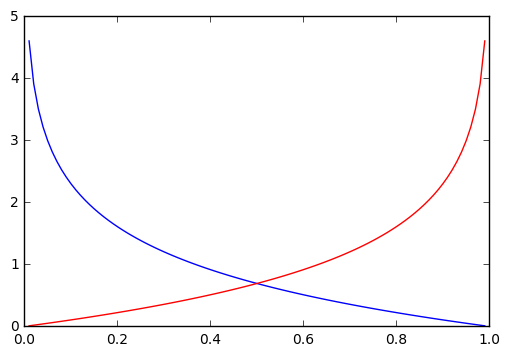

In [9]:
x = np.arange(0.01, 1., 0.01)
ben = [-np.log(y) for y in x]
mal = [-np.log(1-y) for y in x]
plt.plot(x, ben, color='blue')
plt.plot(x, mal, color='red')
plt.show()

In [10]:
class LogisticNeuron(object):

    def __init__(self):
        self._w = 0         # 가중치 w
        self._b = 0         # 바이어스 b
        self._w_grad = 0
        self._b_grad = 0
        self._x = 0         # 입력값 x

    def set_params(self, w, b):
        """가중치와 바이어스를 저장합니다."""
        self._w = w
        self._b = b

    def forpass(self, x):
        """정방향 수식 w * x + b 를 계산하고 결과를 리턴합니다."""
        self._x = x
        _y_hat = self._w * self._x + self._b
        return self._sigmoid(_y_hat)

    def backprop(self, err, lr=0.1):
        """에러를 입력받아 가중치와 바이어스의 변화율을 곱하고 평균을 낸 후 감쇠된 변경량을 저장합니다."""
        m = len(self._x)
        self._w_grad = lr * np.sum(err * self._x) / m
        self._b_grad = lr * np.sum(err * 1) / m

    def update_grad(self, l2=0):
        """계산된 파라메타의 변경량을 업데이트하여 새로운 파라메타를 셋팅합니다."""
        self.set_params(self._w + self._w_grad - l2 * self._w, self._b + self._b_grad)

    def fit(self, X, y, n_iter=10, lr=0.1, cost_check=False, l2=0):
        """정방향 계산을 하고 역방향으로 에러를 전파시키면서 모델을 최적화시킵니다."""
        cost = []
        for i in range(n_iter):
            y_hat = self.forpass(X)
            error = y - y_hat
            self.backprop(error, lr)
            self.update_grad(l2/len(y))
            if cost_check:
                cost.append(np.sum(- y * np.log(y_hat) - (1-y) * np.log(1-y_hat))/len(y))
        return cost
    
    def predict(self, X):
        y_hat = self.forpass(X)
        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat < 0.5] = 0
        return y_hat
    
    def _sigmoid(self, y_hat):
        return 1 / (1 + np.exp(-y_hat))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, \
                                                    test_size=0.1, random_state=10)

In [12]:
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

In [13]:
scale(X_train[:,7][1:10])

array([-0.36575202, -1.09628081,  1.38630179, -0.76004852,  1.57669839,
        1.03184004, -0.97475107,  0.01672909, -0.81473691])

In [14]:
n3 = LogisticNeuron()

In [15]:
n3.set_params(1, 1)
cost = n3.fit(scale(X_train[:,7]), y_train, n_iter=100, cost_check=True)
y_hat = n3.predict(scale(X_test[:,7]))
print(accuracy_score(y_test, y_hat))

0.947368421053


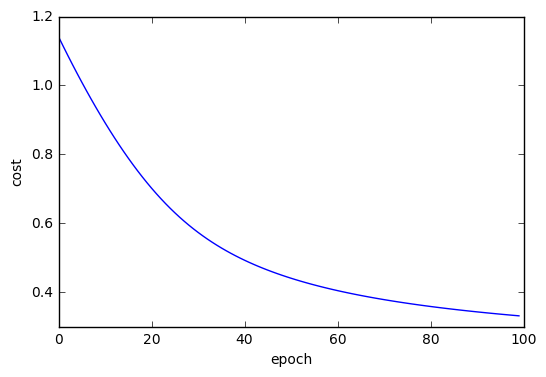

In [16]:
plt.plot(list(range(100)), np.array(cost))
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
lg_regr = SGDClassifier(loss='log', n_iter=100, penalty='none')
lg_regr.fit(X_train[:,7].reshape(-1,1), y_train)
y_hat = lg_regr.predict(X_test[:,7].reshape(-1,1))
print(accuracy_score(y_test, y_hat))

0.947368421053
